<a href="https://colab.research.google.com/github/amirsa-uni/FIFA-2026/blob/main/FIFA_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import math
import warnings
warnings.filterwarnings('ignore')


In [2]:
ListOfYear = []
for i in range(1930,1939,4):
  ListOfYear.append(i)
for i in range(1950,2023,4):
  ListOfYear.append(i)
ListOfYear

[1930,
 1934,
 1938,
 1950,
 1954,
 1958,
 1962,
 1966,
 1970,
 1974,
 1978,
 1982,
 1986,
 1990,
 1994,
 1998,
 2002,
 2006,
 2010,
 2014,
 2018,
 2022]

In [3]:
def addyear(df, x):
  year = [x for i in range(len(df))]
  df['Year']=year
  return df

In [4]:
FIFA = pd.DataFrame()
for i in range(1930,1939,4):
    temp = pd.read_csv('FIFA - '+str(i)+'.csv')
    temp = addyear(temp,i)
    FIFA = pd.concat([FIFA,temp],axis=0,ignore_index=True)

In [5]:
for i in range(1950,2019,4):
    temp = pd.read_csv('FIFA - '+str(i)+'.csv')
    temp = addyear(temp,i)
    FIFA = pd.concat([FIFA,temp],axis=0,ignore_index=True)

In [6]:
FIFA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Position         457 non-null    int64 
 1   Team             457 non-null    object
 2   Games Played     457 non-null    int64 
 3   Win              457 non-null    int64 
 4   Draw             457 non-null    int64 
 5   Loss             457 non-null    int64 
 6   Goals For        457 non-null    int64 
 7   Goals Against    457 non-null    int64 
 8   Goal Difference  457 non-null    object
 9   Points           457 non-null    int64 
 10  Year             457 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 39.4+ KB


In [7]:
FIFA['Goal Difference'].value_counts()

0      58
−1     58
−2     47
−3     44
2      32
1      29
−4     21
4      18
3      18
−5     16
5      14
−6     14
6      12
8      10
−8      8
9       8
7       7
−7      7
11      6
10      5
−9      5
12      4
−12     3
−10     3
14      2
17      1
16      1
-2      1
−16     1
-1      1
−14     1
13      1
−11     1
Name: Goal Difference, dtype: int64

In [8]:
FIFA['Goal Difference'] = FIFA['Goal Difference'].apply(lambda x: -int(x[1]) if x[0] in ['−','-'] else int(x))

In [9]:
i = 2022
temp = pd.read_csv('FIFA - '+str(i)+'.csv')
temp['Goal Difference'] = temp['Goal Difference'].astype('int64')
temp = addyear(temp,i)
FIFA = pd.concat([FIFA,temp],axis=0,ignore_index=True)

In [10]:
FIFA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Position         489 non-null    int64 
 1   Team             489 non-null    object
 2   Games Played     489 non-null    int64 
 3   Win              489 non-null    int64 
 4   Draw             489 non-null    int64 
 5   Loss             489 non-null    int64 
 6   Goals For        489 non-null    int64 
 7   Goals Against    489 non-null    int64 
 8   Goal Difference  489 non-null    int64 
 9   Points           489 non-null    int64 
 10  Year             489 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 42.1+ KB


In [11]:
wc_summ = pd.read_csv("FIFA - World Cup Summary.csv", index_col="YEAR")
wc_summ.head()

,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
YEAR,,,,,,,,
1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1
1938,France,Italy,Hungary,Brazil,15,18,84,4.7
1950,Brazil,Uruguay,Brazil,Sweden,13,22,88,4.0
1954,Switzerland,West Germany,Hungary,Austria,16,26,140,5.4


In [12]:
# FIFA.loc[FIFA["Team"] == 'West Germany', "Team"] = 'Germany'
FIFA['Team'] = FIFA['Team'].apply(lambda x: 'Germany' if x in ['West Germany', 'East Germany'] else x)

In [13]:
label,count = pd.factorize(FIFA['Team'])

len(count)

86

In [14]:
wc_summ.loc[wc_summ["HOST"] == 'West Germany', "HOST"] = 'Germany'
wc_summ.loc[wc_summ["CHAMPION"] == 'West Germany', "CHAMPION"] = 'Germany'
wc_summ.loc[wc_summ["RUNNER UP"] == 'West Germany', "RUNNER UP"] = 'Germany'
wc_summ.loc[wc_summ["THIRD PLACE"] == 'West Germany', "THIRD PLACE"] = 'Germany'

In [15]:
Fifa2 = FIFA.copy()
Fifa2 = Fifa2.drop(columns=['Position','Year'])
FIFA_teams = Fifa2.groupby(['Team']).sum()
FIFA_teams

,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
Team,,,,,,,,
Algeria,13,3,3,7,13,19,-6,10
Angola,3,0,2,1,1,2,-1,2
Argentina,88,49,15,24,152,101,51,138
Australia,20,4,4,12,17,37,-20,16
Austria,29,12,4,13,43,47,-4,28
...,...,...,...,...,...,...,...,...
United States,33,8,6,19,37,62,-25,27
Uruguay,59,25,13,21,89,76,13,73
Wales,8,1,4,3,5,10,-5,6


In [16]:
FIFA_teams['Win Rate'] = (FIFA_teams['Win']/FIFA_teams['Games Played'])*100
FIFA_teams.sort_values(['Games Played','Win'], ascending=False).head(20)
newfifateam = FIFA_teams.sort_values(['Games Played','Win'], ascending=False).head(20)
newfifateam

,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points,Win Rate
Team,,,,,,,,,
Germany,118,70,23,25,237,135,102,192,59.322034
Brazil,114,76,18,20,237,108,129,202,66.666667
Argentina,88,49,15,24,152,101,51,138,55.681818
Italy,82,44,21,17,127,77,50,123,53.658537
England,74,32,22,20,104,68,36,100,43.243243
France,73,39,13,21,136,85,51,115,53.424658
Spain,66,31,16,19,108,74,34,96,46.969697
Mexico,60,17,15,28,62,101,-30,60,28.333333
Uruguay,59,25,13,21,89,76,13,73,42.372881


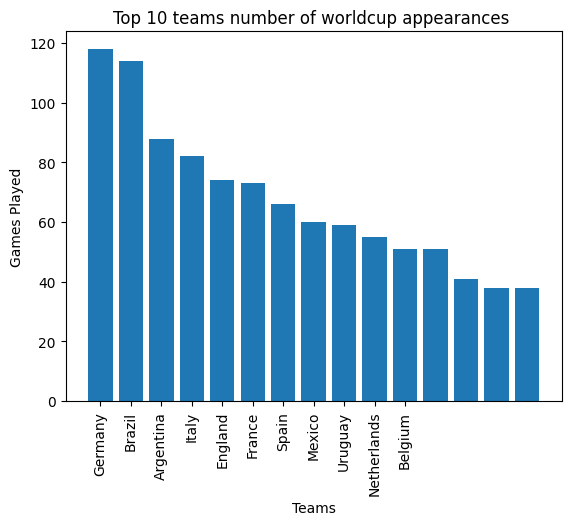

In [17]:
teams = [team for team in newfifateam.index]

plt.bar(teams[:15],newfifateam['Games Played'][:15])
plt.xticks(teams[:11], rotation = 'vertical', size = 10)
plt.ylabel('Games Played')
plt.xlabel('Teams')
plt.title('Top 10 teams number of worldcup appearances ')
plt.show()

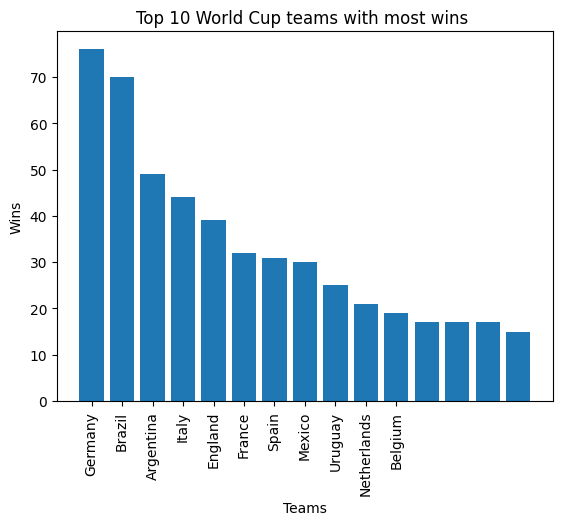

In [18]:
FIFA_teams = FIFA_teams.sort_values(['Win'], ascending = False)

plt.bar(teams[:15],FIFA_teams['Win'][:15])
plt.xlabel('Teams')
plt.ylabel('Wins')
plt.xticks(teams[:11], rotation='vertical', size = 10)
plt.title('Top 10 World Cup teams with most wins ')
plt.show()

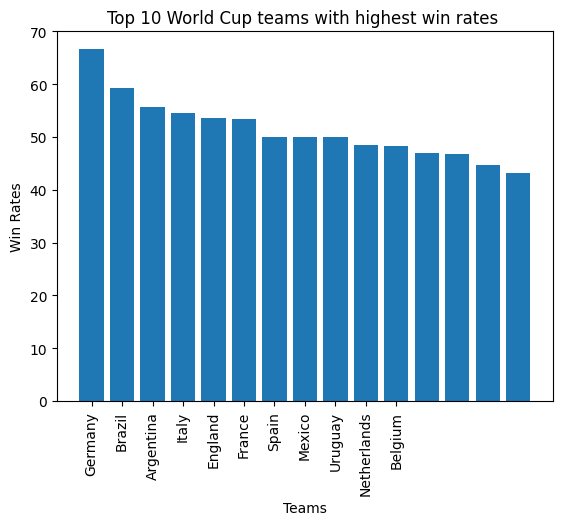

In [19]:
FIFA_teams = FIFA_teams.sort_values(['Win Rate'], ascending = False)

plt.bar(teams[:15],FIFA_teams['Win Rate'][:15])
plt.xlabel('Teams')
plt.ylabel('Win Rates')
plt.xticks(teams[:11], rotation='vertical', size = 10)
plt.title('Top 10 World Cup teams with highest win rates ')
plt.show()

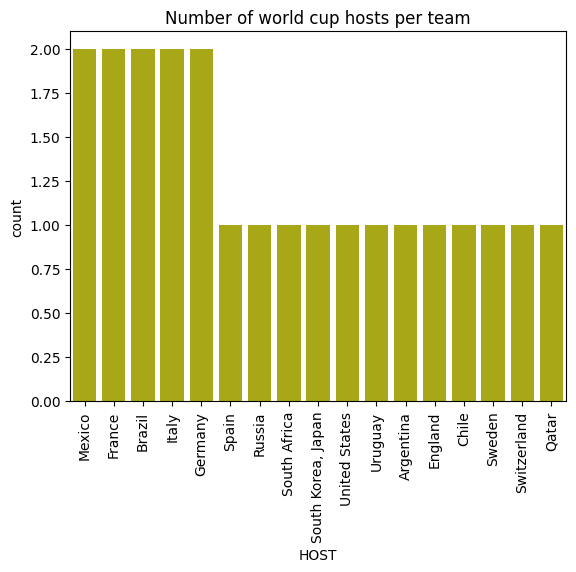

In [20]:
table_HOST_wc_summ = wc_summ['HOST'].value_counts()

sns.countplot(data=wc_summ, x='HOST', order=table_HOST_wc_summ.index.values, color='y')
plt.title('Number of world cup hosts per team')
plt.xticks(rotation=90);

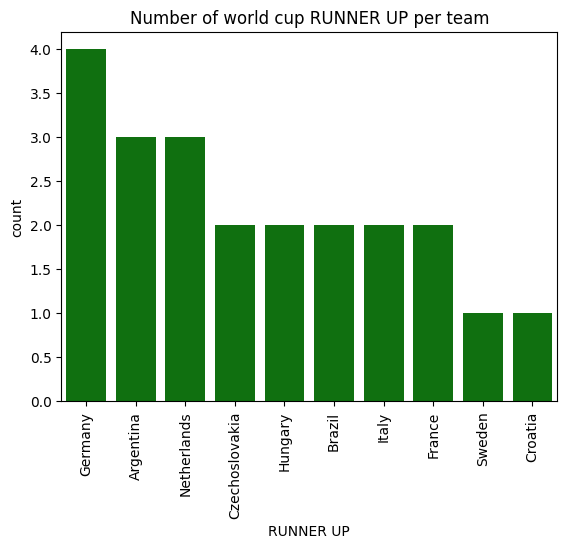

In [21]:
table_RUNNER_UP_wc_summ = wc_summ['RUNNER UP'].value_counts()

sns.countplot(data=wc_summ, x='RUNNER UP', order=table_RUNNER_UP_wc_summ.index.values, color='g')
plt.title('Number of world cup RUNNER UP per team')
plt.xticks(rotation=90);

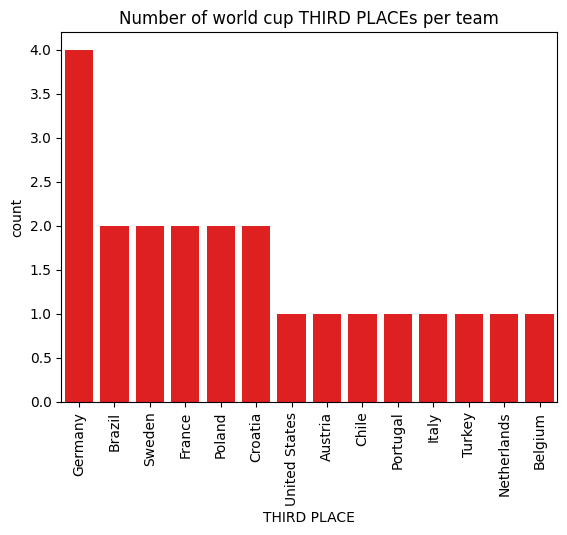

In [22]:
table_THIRD_PLACE_wc_summ = wc_summ['THIRD PLACE'].value_counts()

sns.countplot(data=wc_summ, x='THIRD PLACE', order=table_THIRD_PLACE_wc_summ.index.values, color='r')
plt.title('Number of world cup THIRD PLACEs per team')
plt.xticks(rotation=90);

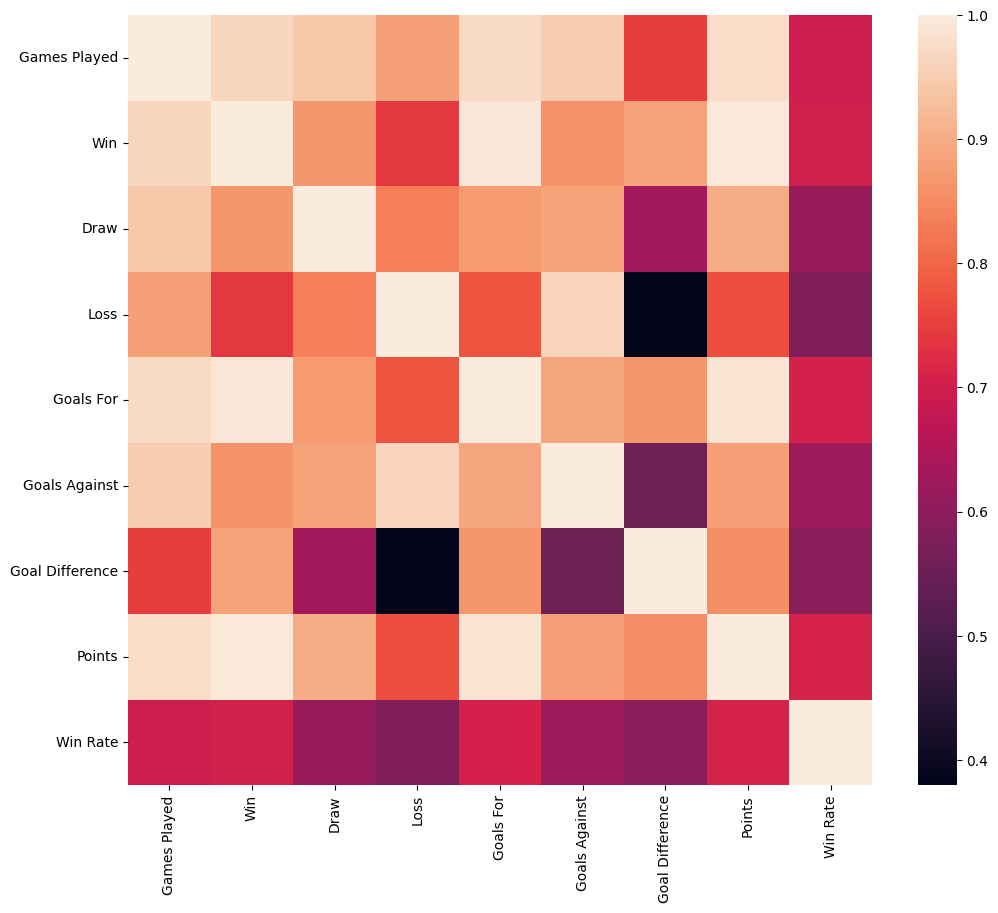

In [23]:
plt.figure(figsize=(12,10))
dataplot = sns.heatmap(FIFA_teams.corr())

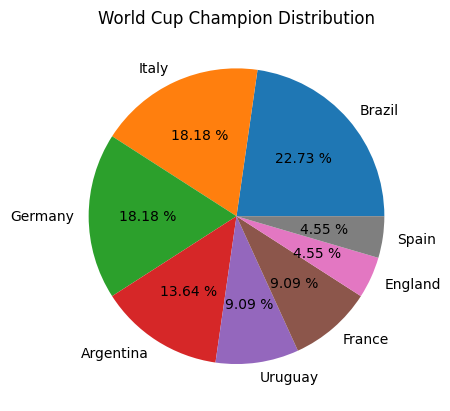

In [24]:
table1 = wc_summ['CHAMPION'].value_counts()
table1
plt.pie(table1, labels=['Brazil', 'Italy', 'Germany', 'Argentina', 'Uruguay', 'France', 'England', 'Spain'], autopct='%.2f %%')
plt.title('World Cup Champion Distribution');

Text(0.5, 0, 'Team')

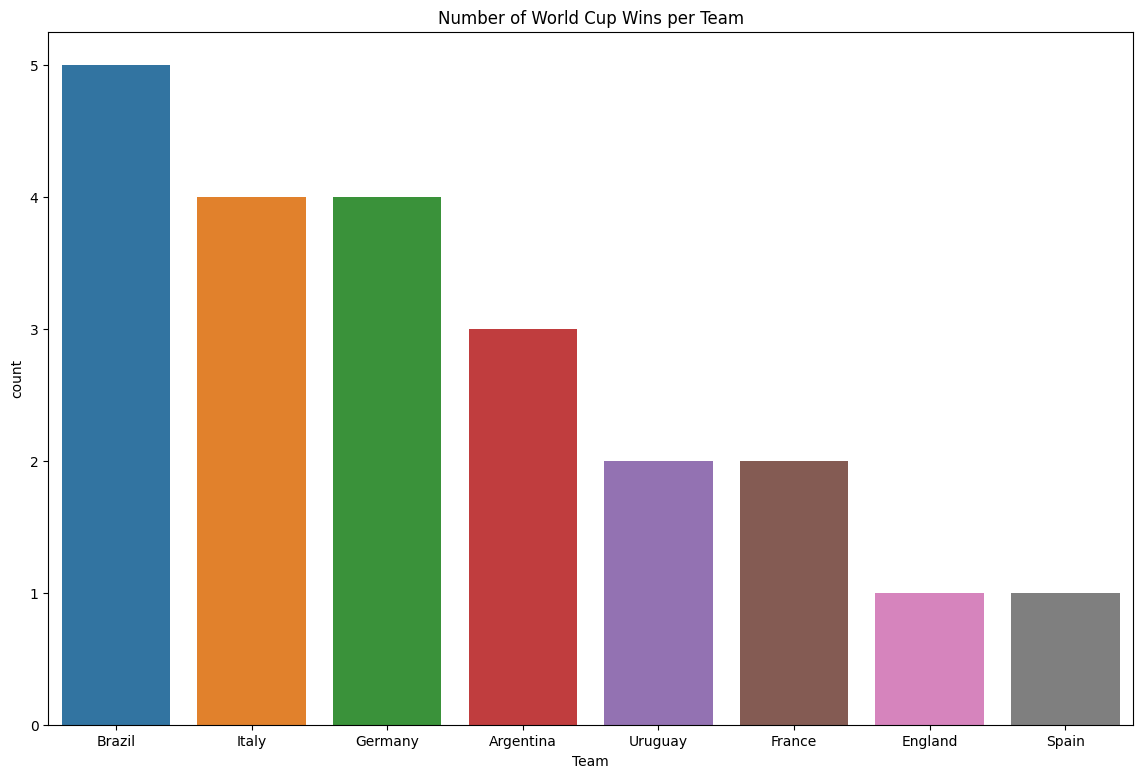

In [25]:
# Generate a count plot of World Cup wins per Team

plt.figure(figsize=(14,9))
plt.title("Number of World Cup Wins per Team")
sns.countplot(data=wc_summ, x="CHAMPION", order=wc_summ['CHAMPION'].value_counts().index)
plt.xlabel("Team")

Text(0.5, 0, 'Boolean for Host Country Wins')

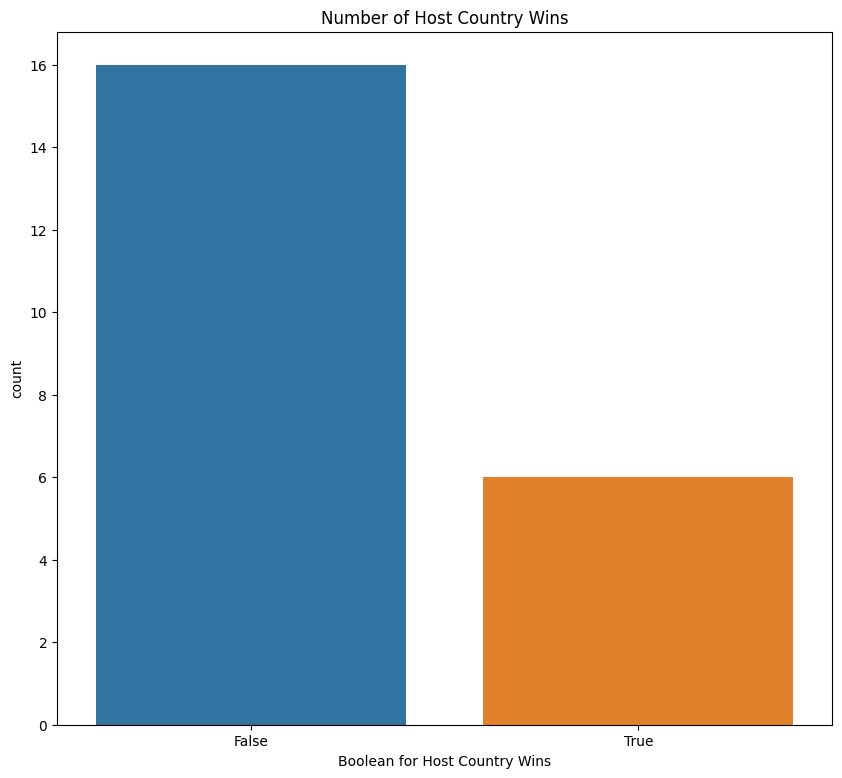

In [26]:
# Add a new column to the dataframe which represents a boolean if host country won 

host_won = []
for index, row in wc_summ.iterrows():
    host_won.append(row["HOST"] == row["CHAMPION"])
wc_summ["HOST WON"] = host_won

# Generate a count plot of booleans that indicates that the host country won

plt.figure(figsize=(10,9))
plt.title("Number of Host Country Wins")
sns.countplot(data=wc_summ, x="HOST WON")
plt.xlabel("Boolean for Host Country Wins")

In [27]:
# Calculating percentage of Host Country Wins

host_win_total = len(wc_summ[wc_summ["HOST WON"] == True]) 
tournament_total = len(wc_summ) 
host_win_percentage = (host_win_total/tournament_total)*100
host_win_percentage

27.27272727272727

In [28]:
# Generate list of teams and unique teams

list_of_teams = []


for i in ListOfYear:
  temp = pd.read_csv('FIFA - '+str(i)+'.csv')
  for team in temp['Team']:
    list_of_teams.append(team)


unique_teams = list(set(list_of_teams))
print(f"There are {len(unique_teams)} unique teams out of the {len(list_of_teams)} that have participated in the history of the World Cup.")

There are 88 unique teams out of the 489 that have participated in the history of the World Cup.


In [29]:
# Calculate number of appearances per team in the World Cup 

team_apps = {
    "Team": [],
    "Appearances": []
}
for team in unique_teams:
    team_apps["Team"].append(team)
    team_apps["Appearances"].append(list_of_teams.count(team))
team_apps_data = pd.DataFrame(team_apps).sort_values(by="Appearances", ascending=False).reset_index(drop=True)


In [30]:
team_apps_data

,Team,Appearances
0,Brazil,22
1,Italy,18
2,Argentina,18
3,Mexico,17
4,France,16
...,...,...
83,Haiti,1
84,East Germany,1
85,Iceland,1
86,Czech Republic,1


In [31]:
team_apps_data.tail()

,Team,Appearances
83,Haiti,1
84,East Germany,1
85,Iceland,1
86,Czech Republic,1
87,Iraq,1


Text(0, 0.5, 'Goals Scored')

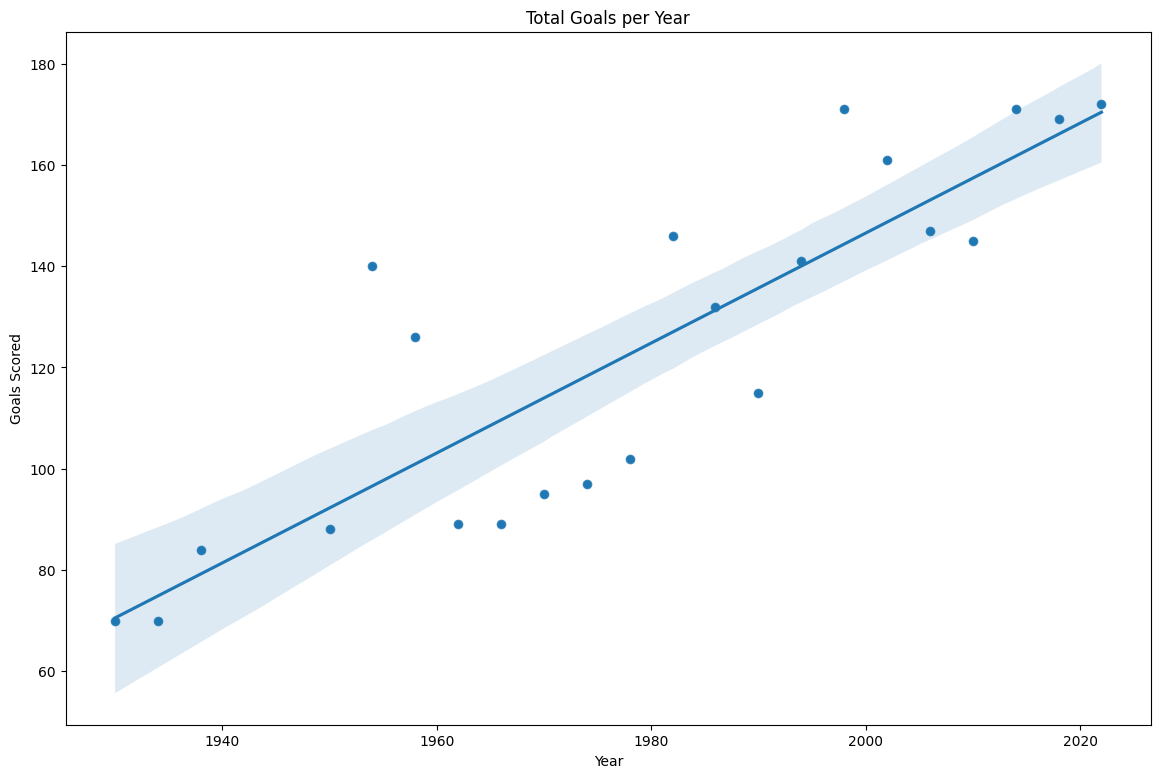

In [32]:
# Generate plot for total goals per year

plt.figure(figsize=(14,9))
plt.title("Total Goals per Year")
sns.scatterplot(x=wc_summ.index, y=wc_summ["GOALS SCORED"])
sns.regplot(x=wc_summ.index, y=wc_summ["GOALS SCORED"])
plt.xlabel("Year")
plt.ylabel("Goals Scored")

Text(0, 0.5, 'Average Goals per Game')

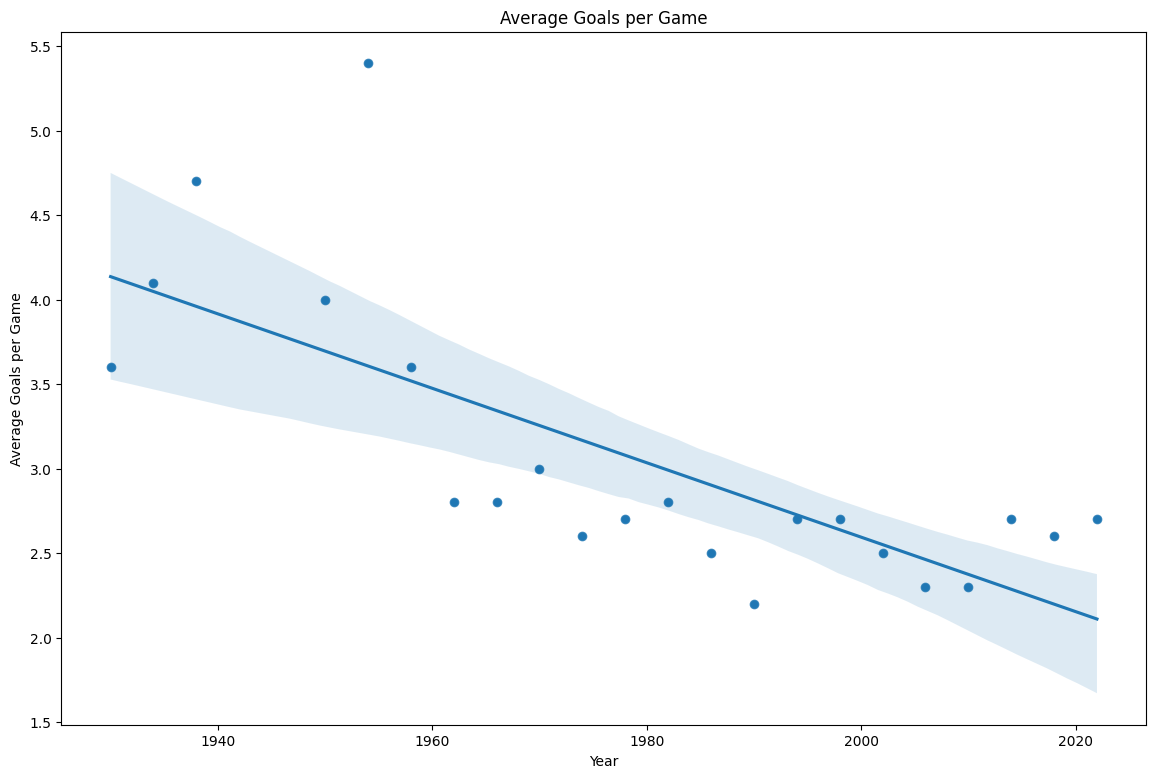

In [33]:
# Generate plot for average number of goals per game per year

plt.figure(figsize=(14,9))
plt.title("Average Goals per Game")
sns.scatterplot(x=wc_summ.index, y=wc_summ["AVG GOALS PER GAME"])
sns.regplot(x=wc_summ.index, y=wc_summ["AVG GOALS PER GAME"])
plt.xlabel("Year")
plt.ylabel("Average Goals per Game")

Text(0, 0.5, 'Matches per Year')

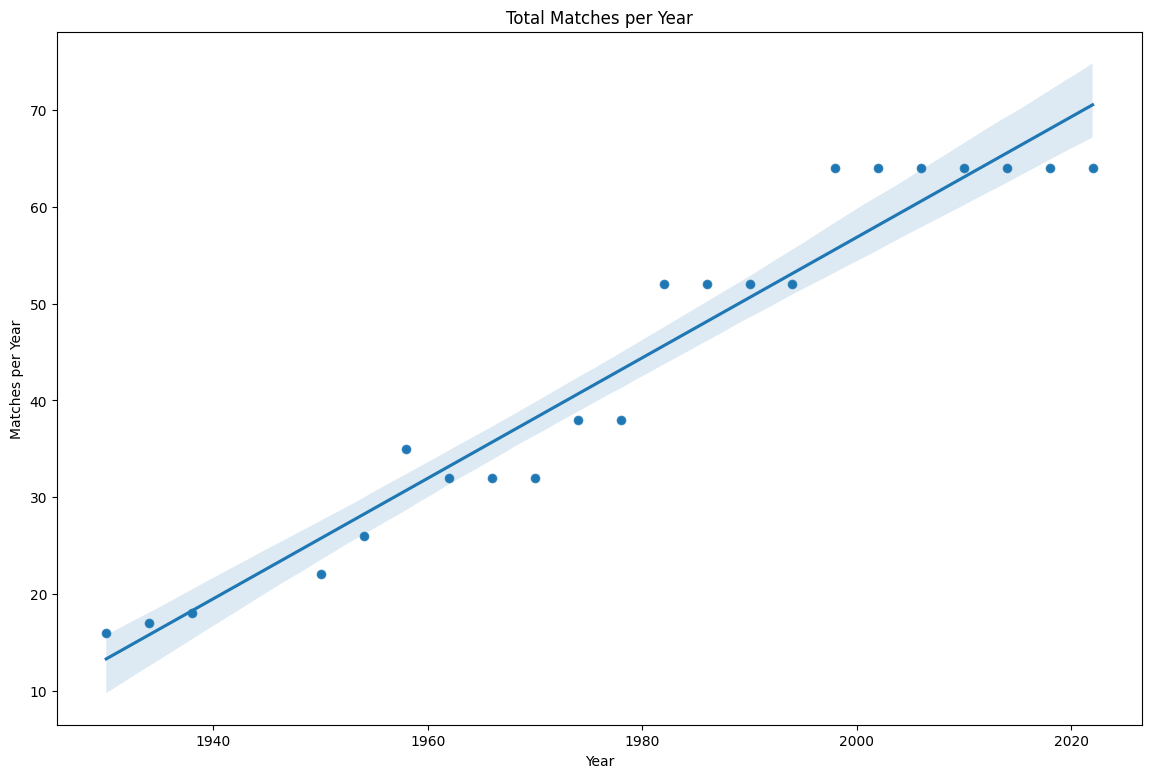

In [34]:
# Generate plot for total matches per year

plt.figure(figsize=(14,9))
plt.title("Total Matches per Year")
sns.scatterplot(x=wc_summ.index, y=wc_summ["MATCHES PLAYED"])
sns.regplot(x=wc_summ.index, y=wc_summ["MATCHES PLAYED"])
plt.xlabel("Year")
plt.ylabel("Matches per Year")

In [35]:
# Generate champion data

champion_data = {
    "Year": ListOfYear,
    "Team": [],
    "Goals Scored": [],
    "Goals Conceded": [],
}

for i in ListOfYear: 
  tournament = pd.read_csv('FIFA - '+str(i)+'.csv')
  champion_data["Team"].append(tournament.iloc[0]["Team"])
  champion_data["Goals Scored"].append(tournament.iloc[0]["Goals For"])
  champion_data["Goals Conceded"].append(tournament.iloc[0]["Goals Against"])

champion_df = pd.DataFrame(champion_data).set_index("Year")
champion_df.head()

,Team,Goals Scored,Goals Conceded
Year,,,
1930,Uruguay,15,3
1934,Italy,11,3
1938,Italy,11,5
1950,Uruguay,15,5
1954,West Germany,25,14


Text(0, 0.5, 'Probability Density')

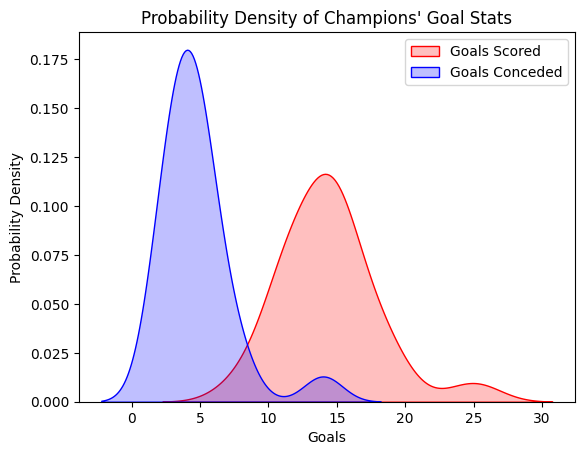

In [36]:
# Generate probability density of champions' goals scored and conceded

plt.title("Probability Density of Champions' Goal Stats")
sns.kdeplot(data=champion_df["Goals Scored"], color='r', fill=True, label="Goals Scored")
sns.kdeplot(data=champion_df["Goals Conceded"], color='b', fill=True, label="Goals Conceded")
plt.legend()
plt.xlabel("Goals")
plt.ylabel("Probability Density")

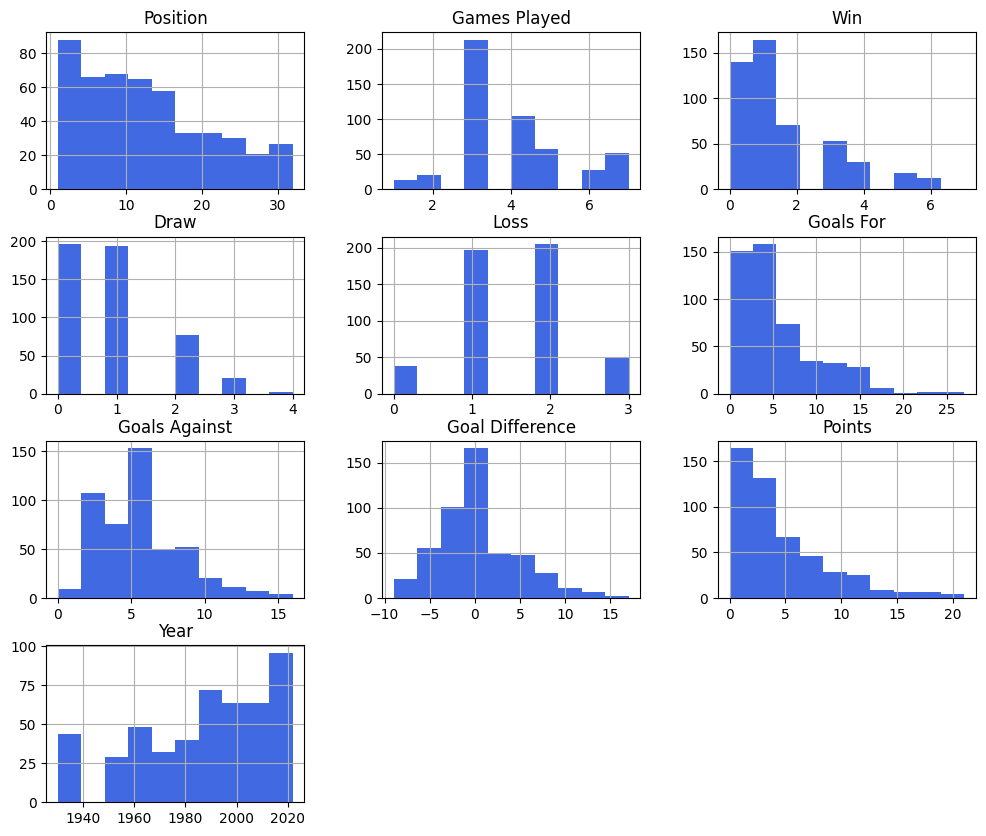

In [37]:
#distribution of each variable
FIFA.hist(figsize = (12,10), color = 'royalblue')
plt.show()

In [38]:
FIFA

,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points,Year
0,1,Uruguay,4,4,0,0,15,3,12,8,1930
1,2,Argentina,5,4,0,1,18,9,9,8,1930
2,3,United States,3,2,0,1,7,6,1,4,1930
3,4,Yugoslavia,3,2,0,1,7,7,0,4,1930
4,5,Chile,3,2,0,1,5,3,2,4,1930
...,...,...,...,...,...,...,...,...,...,...,...
484,28,Denmark,3,0,1,2,1,3,-2,1,2022
485,29,Serbia,3,0,1,2,5,8,-3,1,2022
486,30,Wales,3,0,1,2,1,6,-5,1,2022
487,31,Canada,3,0,0,3,2,7,-5,0,2022


In [39]:
labels,counts = pd.factorize(FIFA['Team'])
namess = FIFA['Team'].iloc[:].values
teamnamess = {}
for i in range(len(labels)):
  teamnamess[i]= namess[i]
  
print(teamnamess)


{0: 'Uruguay', 1: 'Argentina', 2: 'United States', 3: 'Yugoslavia', 4: 'Chile', 5: 'Brazil', 6: 'France', 7: 'Romania', 8: 'Paraguay', 9: 'Peru', 10: 'Belgium', 11: 'Bolivia', 12: 'Mexico', 13: 'Italy', 14: 'Czechoslovakia', 15: 'Germany', 16: 'Austria', 17: 'Spain', 18: 'Hungary', 19: 'Switzerland', 20: 'Sweden', 21: 'Argentina', 22: 'France', 23: 'Netherlands', 24: 'Romania', 25: 'Egypt', 26: 'Brazil', 27: 'Belgium', 28: 'United States', 29: 'Italy', 30: 'Hungary', 31: 'Brazil', 32: 'Sweden', 33: 'Czechoslovakia', 34: 'Switzerland', 35: 'Cuba', 36: 'France', 37: 'Romania', 38: 'Germany', 39: 'Poland', 40: 'Norway', 41: 'Belgium', 42: 'Netherlands', 43: 'Dutch East Indies', 44: 'Uruguay', 45: 'Brazil', 46: 'Sweden', 47: 'Spain', 48: 'Yugoslavia', 49: 'Switzerland', 50: 'Italy', 51: 'England', 52: 'Chile', 53: 'United States', 54: 'Paraguay', 55: 'Mexico', 56: 'Bolivia', 57: 'Germany', 58: 'Hungary', 59: 'Austria', 60: 'Uruguay', 61: 'Switzerland', 62: 'Brazil', 63: 'England', 64: 'Yug

In [40]:
#use it before feeding it to any algorithm else avoid it
labels,counts = pd.factorize(FIFA['Team'])
FIFA['Team'] = labels

In [41]:
FIFA

,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points,Year
0,1,0,4,4,0,0,15,3,12,8,1930
1,2,1,5,4,0,1,18,9,9,8,1930
2,3,2,3,2,0,1,7,6,1,4,1930
3,4,3,3,2,0,1,7,7,0,4,1930
4,5,4,3,2,0,1,5,3,2,4,1930
...,...,...,...,...,...,...,...,...,...,...,...
484,28,52,3,0,1,2,1,3,-2,1,2022
485,29,80,3,0,1,2,5,8,-3,1,2022
486,30,31,3,0,1,2,1,6,-5,1,2022
487,31,54,3,0,0,3,2,7,-5,0,2022


## **MODELSS**

In [42]:
# #Make sure that other results in below and above box are commented out
FIFAsplit = FIFA.copy()
# X = FIFAsplit.drop('Win', axis = 1)
# y = FIFAsplit['Win']
# X = FIFAsplit.drop('Points', axis = 1)
# y = FIFAsplit['Points']
# X = FIFAsplit.drop('Goal Difference', axis = 1)
# y = FIFAsplit['Goal Difference']
X = FIFAsplit.drop('Team', axis = 1)
y = FIFAsplit['Team']



In [43]:
X

,Position,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points,Year
0,1,4,4,0,0,15,3,12,8,1930
1,2,5,4,0,1,18,9,9,8,1930
2,3,3,2,0,1,7,6,1,4,1930
3,4,3,2,0,1,7,7,0,4,1930
4,5,3,2,0,1,5,3,2,4,1930
...,...,...,...,...,...,...,...,...,...,...
484,28,3,0,1,2,1,3,-2,1,2022
485,29,3,0,1,2,5,8,-3,1,2022
486,30,3,0,1,2,1,6,-5,1,2022
487,31,3,0,0,3,2,7,-5,0,2022


In [44]:
X = X.iloc[:,:].values
y = y.iloc[:].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(342, 10)
(342,)
(147, 10)
(147,)


In [45]:
X_train

array([[   6,    5,    2, ...,    3,    8, 2002],
       [  21,    3,    0, ...,   -4,    1, 1986],
       [   9,    4,    1, ...,    3,    3, 1958],
       ...,
       [  13,    3,    0, ...,   -3,    1, 1966],
       [   4,    6,    3, ...,   -2,    7, 1950],
       [   4,    7,    3, ...,    4,    8, 1982]])

In [46]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.3951472777627649

In [47]:
t = np.array([[10,4,4,0,0,10,2,8,8,2026]]) # it's a sample to predict who would win in 2026
ans = lr.predict(t)


In [48]:
import math
teamnamess[math.ceil(ans)]

'France'

In [49]:
#Ridge Regression
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.39515594732113035

In [50]:
#Lasso Regression
lasso = Lasso(alpha = 0.5)
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.393286734166698

In [51]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.16974421843036147

In [52]:
#SVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.24156750335964738

In [53]:
#prediction
y_pred = lr.predict(X_test)
print(y_pred)

[ 7.22846108 24.72162514 15.76219759 55.78398125 12.09191417 51.63276562
 19.44601426 36.71777501 16.3616351  11.75462856 19.49531017 36.86834669
 30.50117315 17.74985563 19.35434619 24.41156807 14.67907246 22.28802269
 27.84830061 28.14448832 27.67697376 16.87670771 23.06027375 12.04173817
 47.62761436 23.33740563 22.67997146 21.55900107 34.04796922 45.58596068
 22.73317979 17.11444761 37.30404548 18.29029405 13.75690312 20.77708683
 37.00496939 49.20955778 30.55625431 31.3989186  38.70069504 11.59986822
 32.54282683 11.74940038 43.17016053 40.74977134  2.16619527 24.36373063
 21.4173082  40.91537961 23.44082466 20.35225192 34.93675262 40.12542621
 29.92049379 27.31435379 46.39406624 29.84363928 30.66859682 52.00028646
 10.59149244 20.53683562 21.60270217 17.65365025 12.85326575 19.1265334
 23.77897867 11.91769643 17.29675608 38.49879741 14.96561854 16.18723147
 17.01318063 30.22061596 49.6833163  21.41231611 30.41439047 15.64458237
 25.15547245 39.09376079  9.45480859 18.98580289 25.

In [54]:
#check MAE, MSE and RMSE
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error :', math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error : 14.838395684372031
Mean Squared Error : 342.2533195323559
Root Mean Squared Error : 18.500089716873156


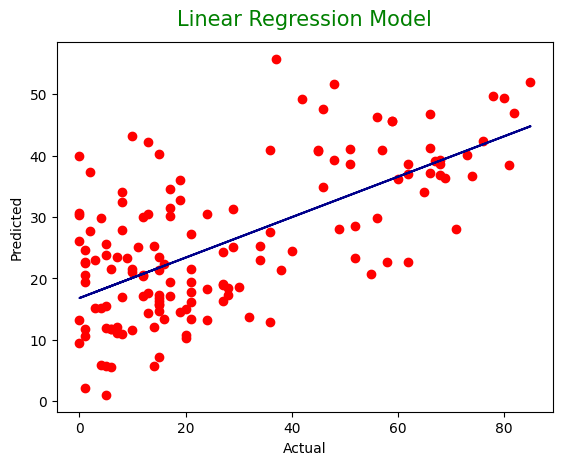

In [55]:
#visualize model
x = y_test
y = y_pred

plt.title('Linear Regression Model', fontsize = 15, color = 'g', pad = 12)
plt.plot(x, y, 'o', color = 'r')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
Model = RandomForestClassifier(random_state=100,n_jobs=-1)

params = {'n_estimators':[200],
          'max_depth':[3,6,10,15,20,25,30],
          'max_features':[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7]}

grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='accuracy')
grid_search.fit(X_train,y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(accuracy_score(y_test,y_pred))

Fitting 5 folds for each of 91 candidates, totalling 455 fits
0.047619047619047616


In [56]:
rresults=[]
for i in range(10):
    t = np.array([[i,4,4,0,0,10,2,10,8,2026]]) # it's a sample to predict who would win in 2026
    ans = lr.predict(t)
    rresults.append(teamnamess[math.ceil(ans)])
print(rresults)

In [58]:
run_query = input("Do you want to run a query(y/n): ").lower()

while(run_query!='n'):
    
    #10,4,4,0,0,10,2,8,8,2026
    x1 = int(input('\nEnter the value for Position(Range 1 to 32): '))
    x2 = int(input('Enter the value for Games Played: '))
    x3 = int(input('Enter the value for Win: '))
    x4 = int(input('Enter the value for Draw: '))
    x5 = int(input('Enter the value for Loss: '))
    x6 = int(input('Enter the value for Goals For: '))
    x7 = int(input('Enter the value for Goals Against: '))
    x8 = int(input('Enter the value for Goal Difference: '))
    x9 = int(input('Enter the value for Points: '))
    x10 = int(input('Enter the value for Year: '))
    t = np.array([[x1,x2,x3,x4,x5,x6,x7,x8,x9,x10]]) # it's a sample to predict who would win in 2026
    ans = lr.predict(t)
    print(teamnamess[math.ceil(ans)])    
    run_query = input("\nDo you want to run a query again (y/n): ").lower()

print("Search Completed!!!")

Do you want to run a query(y/n): y

Enter the value for Position(Range 1 to 32): 18
Enter the value for Games Played: 32
Enter the value for Win: 3
Enter the value for Draw: 2
Enter the value for Loss: 4
Enter the value for Goals For: 15
Enter the value for Goals Against: 16
Enter the value for Goal Difference: 5
Enter the value for Points: 9
Enter the value for Year: 2006
United States

Do you want to run a query again (y/n): y

Enter the value for Position(Range 1 to 32): 32
Enter the value for Games Played: 5
Enter the value for Win: 6
Enter the value for Draw: 8
Enter the value for Loss: 1
Enter the value for Goals For: 4
Enter the value for Goals Against: 16
Enter the value for Goal Difference: 15
Enter the value for Points: 23
Enter the value for Year: 2018
Paraguay

Do you want to run a query again (y/n): n
Search Completed!!!
